In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv('btc_done.csv')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['0'], df['answer'].to_numpy(), test_size=0.2, random_state=2)


In [8]:
print(y_test)

[False False False ... False False False]


In [10]:
pd.Series(y_train).value_counts()

False    387371
True       3938
dtype: int64

In [11]:
#기분모델 정확도 98%? 어가 잘못됐나? 
387371/(387371+3938) *100

98.99363418679356

In [13]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [14]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))


훈련 정확도:  0.9899363418679356


In [15]:
print('검증 정확도: ', pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)

검증 정확도:  0.990197080590424


/Users/kangmolee/opt/anaconda3/envs/s3pro/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


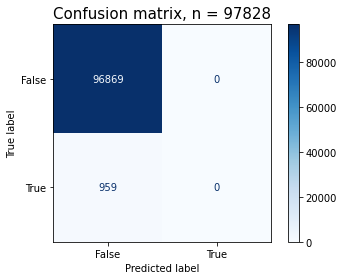

In [17]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [18]:
import pickle 
with open('model_1.pickle','wb') as fw:
    pickle.dump(pipe, fw)

In [19]:
import pickle 
with open('model_1.pickle', 'rb') as f: 
    model = pickle.load(f)

In [20]:
print('검증 정확도: ', model.score(X_test, y_test))

검증 정확도:  0.990197080590424
